In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/plants dataset

/content/drive/.shortcut-targets-by-id/1sFkTFiHix4JCgwOqH1iYYCPCXvLPuOaj/plants dataset


In [ ]:
!dir

dataset_information.csv        kaggle.json		preprocessed_images_labels.pkl
dataset_labels.csv	       ML_SVM_model_scores.csv	preprocessed_images.pkl
inception_v3_model_scores.csv  plant\ disease\ dataset	vgg_scores.csv


In [ ]:
#! unzip 'plant disease dataset.zip'

Archive:  plant disease dataset.zip
   creating: plant disease dataset/
   creating: plant disease dataset/Apple___Apple_scab/
  inflating: plant disease dataset/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG  
  inflating: plant disease dataset/Apple___Apple_scab/0340dc35-5215-48ab-8db7-06af99fcb358___FREC_Scab 2966.JPG  
  inflating: plant disease dataset/Apple___Apple_scab/09e40e4f-f8bc-4537-b20d-0b244760dbf4___FREC_Scab 3216.JPG  
  inflating: plant disease dataset/Apple___Apple_scab/0d3c0790-7833-470b-ac6e-94d0a3bf3e7c___FREC_Scab 2959.JPG  
  inflating: plant disease dataset/Apple___Apple_scab/0ea78733-9404-4536-8793-a108c66269b3___FREC_Scab 3145.JPG  
  inflating: plant disease dataset/Apple___Apple_scab/11f5b020-3dfd-400c-9819-7d229bc5f929___FREC_Scab 2945.JPG  
  inflating: plant disease dataset/Apple___Apple_scab/12bc3d5c-2409-426e-b6cb-a08cbf488153___FREC_Scab 3154.JPG  
  inflating: plant disease dataset/Apple___Apple_scab/18ea82fd-4e16-416f-8a

In [ ]:
import os
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn
import cv2
import numpy as np
import random
import sklearn.model_selection
from keras.utils import to_categorical

In [ ]:
!ls

 dataset_information.csv	 kaggle.json		   preprocessed_images_labels.pkl
 dataset_labels.csv		 ML_SVM_model_scores.csv   preprocessed_images.pkl
 inception_v3_model_scores.csv	'plant disease dataset'    vgg_scores.csv


In [ ]:
dataset_directory = 'plant disease dataset'
sorted(os.listdir(dataset_directory))

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
dataset_directory = 'plant disease dataset'
class_folders = sorted(os.listdir(dataset_directory))
image_paths = []
labels = []
image_names = []

for class_folder in class_folders:
    class_path = os.path.join(dataset_directory, class_folder)
    image_files = sorted(os.listdir(class_path))
    pass
    for idx, image_file in enumerate(image_files):
        image_names.append(image_file)
        image_path = os.path.join(class_path, image_file)
        image_paths.append(image_path)
        labels.append(class_folder)
        pass

plant_disease_dataFrame = pd.DataFrame({'image_path': image_paths, 'class_name': labels})
plant_disease_dataFrame['image_name'] = image_names

plant_disease_dataFrame = plant_disease_dataFrame[['image_name','image_path','class_name']]

In [ ]:
plant_disease_dataFrame

image_name  \
0     01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Sc...   
1     0340dc35-5215-48ab-8db7-06af99fcb358___FREC_Sc...   
2     09e40e4f-f8bc-4537-b20d-0b244760dbf4___FREC_Sc...   
3     0d3c0790-7833-470b-ac6e-94d0a3bf3e7c___FREC_Sc...   
4     0ea78733-9404-4536-8793-a108c66269b3___FREC_Sc...   
...                                                 ...   
3795  f60f6c8b-54f7-4002-b26d-636037912c4d___RS_HL 9...   
3796  f62d9b06-1625-4277-9347-0f3097c41fcf___GH_HL L...   
3797  fb123526-11fd-4d0d-96cc-3423da0b61a2___RS_HL 9...   
3798  fb4ce6df-613b-4d52-8e11-28dfa448a5e1___GH_HL L...   
3799  fd09836b-96be-498a-a720-e17a54522de7___RS_HL 9...   

                                             image_path          class_name  
0     plant disease dataset/Apple___Apple_scab/01a66...  Apple___Apple_scab  
1     plant disease dataset/Apple___Apple_scab/0340d...  Apple___Apple_scab  
2     plant disease dataset/Apple___Apple_scab/09e40...  Apple___Apple_scab  
3     plant disease dataset/Apple___Apple_scab/0d3c0...  Apple___Apple_scab  
4     plant disease dataset/Apple___Apple_scab/0ea78...  Apple___Apple_scab  
...                                                 ...                 ...  
3795  plant disease dataset/Tomato___healthy/f60f6c8...    Tomato___healthy  
3796  plant disease dataset/Tomato___healthy/f62d9b0...    Tomato___healthy  
3797  plant disease dataset/Tomato___healthy/fb12352...    Tomato___healthy  
3798  plant disease dataset/Tomato___healthy/fb4ce6d...    Tomato___healthy  
3799  plant disease dataset/Tomato___healthy/fd09836...    Tomato___healthy  

[3800 rows x 3 columns]

In [ ]:
label_encoder = sklearn.preprocessing.LabelEncoder()
print("The classes:\n")

# Creating new dataframe with only unique classes names (38)
classes_dataFrame = plant_disease_dataFrame['class_name'].drop_duplicates(inplace=False)

# Assigning unique label to each class
labels = label_encoder.fit_transform(classes_dataFrame)
labels_dataFrame = pd.DataFrame(classes_dataFrame.values.tolist(),columns=['class_name'],index=None)

labels_dataFrame['label'] = labels
labels_dataFrame

The classes:



class_name  label
0                                  Apple___Apple_scab      0
1                                   Apple___Black_rot      1
2                            Apple___Cedar_apple_rust      2
3                                     Apple___healthy      3
4                                 Blueberry___healthy      4
5            Cherry_(including_sour)___Powdery_mildew      5
6                   Cherry_(including_sour)___healthy      6
7   Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...      7
8                         Corn_(maize)___Common_rust_      8
9                 Corn_(maize)___Northern_Leaf_Blight      9
10                             Corn_(maize)___healthy     10
11                                  Grape___Black_rot     11
12                       Grape___Esca_(Black_Measles)     12
13         Grape___Leaf_blight_(Isariopsis_Leaf_Spot)     13
14                                    Grape___healthy     14
15           Orange___Haunglongbing_(Citrus_greening)     15
16                             Peach___Bacterial_spot     16
17                                    Peach___healthy     17
18                      Pepper,_bell___Bacterial_spot     18
19                             Pepper,_bell___healthy     19
20                              Potato___Early_blight     20
21                               Potato___Late_blight     21
22                                   Potato___healthy     22
23                                Raspberry___healthy     23
24                                  Soybean___healthy     24
25                            Squash___Powdery_mildew     25
26                           Strawberry___Leaf_scorch     26
27                               Strawberry___healthy     27
28                            Tomato___Bacterial_spot     28
29                              Tomato___Early_blight     29
30                               Tomato___Late_blight     30
31                                 Tomato___Leaf_Mold     31
32                        Tomato___Septoria_leaf_spot     32
33      Tomato___Spider_mites Two-spotted_spider_mite     33
34                               Tomato___Target_Spot     34
35             Tomato___Tomato_Yellow_Leaf_Curl_Virus     35
36                       Tomato___Tomato_mosaic_virus     36
37                                   Tomato___healthy     37

In [ ]:
labels_dataFrame.to_csv('dataset_labels.csv',index=False)

In [ ]:
#creating new column "label" in original dataframe and assigning labels from label_dataframe based on classes names
for label, class_name in labels_dataFrame[['label','class_name']].values:
  plant_disease_dataFrame.loc[plant_disease_dataFrame["class_name"] == class_name, "label"] = str(label)
  pass
plant_disease_dataFrame['label'] = plant_disease_dataFrame['label'].apply(pd.to_numeric)
plant_disease_dataFrame.sort_values(by=['label'],inplace=True)

In [ ]:
plant_disease_dataFrame

image_name  \
0     01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Sc...   
72    b1efda88-84a3-4d96-b3bf-48d7e12155e9___FREC_Sc...   
71    b19d8a20-6d33-4ad5-848b-e618c07756b7___FREC_Sc...   
70    b19aef4d-ee91-4768-9520-8fdfee2578b4___FREC_Sc...   
69    af598e54-dae1-47e5-aefc-0b0a419dfa07___FREC_Sc...   
...                                                 ...   
3727  431e5099-0b4d-433c-bba9-85e6ded06f4d___RS_HL 9...   
3726  43014e59-9f8f-4e30-9548-22afff8a0d65___RS_HL 0...   
3725  41b01db4-dcc7-4f71-8d24-11a581577f71___RS_HL 9...   
3735  5a86d688-c358-481d-9618-ee14a5742234___RS_HL 0...   
3799  fd09836b-96be-498a-a720-e17a54522de7___RS_HL 9...   

                                             image_path          class_name  \
0     plant disease dataset/Apple___Apple_scab/01a66...  Apple___Apple_scab   
72    plant disease dataset/Apple___Apple_scab/b1efd...  Apple___Apple_scab   
71    plant disease dataset/Apple___Apple_scab/b19d8...  Apple___Apple_scab   
70    plant disease dataset/Apple___Apple_scab/b19ae...  Apple___Apple_scab   
69    plant disease dataset/Apple___Apple_scab/af598...  Apple___Apple_scab   
...                                                 ...                 ...   
3727  plant disease dataset/Tomato___healthy/431e509...    Tomato___healthy   
3726  plant disease dataset/Tomato___healthy/43014e5...    Tomato___healthy   
3725  plant disease dataset/Tomato___healthy/41b01db...    Tomato___healthy   
3735  plant disease dataset/Tomato___healthy/5a86d68...    Tomato___healthy   
3799  plant disease dataset/Tomato___healthy/fd09836...    Tomato___healthy   

      label  
0         0  
72        0  
71        0  
70        0  
69        0  
...     ...  
3727     37  
3726     37  
3725     37  
3735     37  
3799     37  

[3800 rows x 4 columns]

<ipython-input-10-3a403c85d1f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  x = seaborn.barplot(x=class_counts.values, y=class_counts.index,


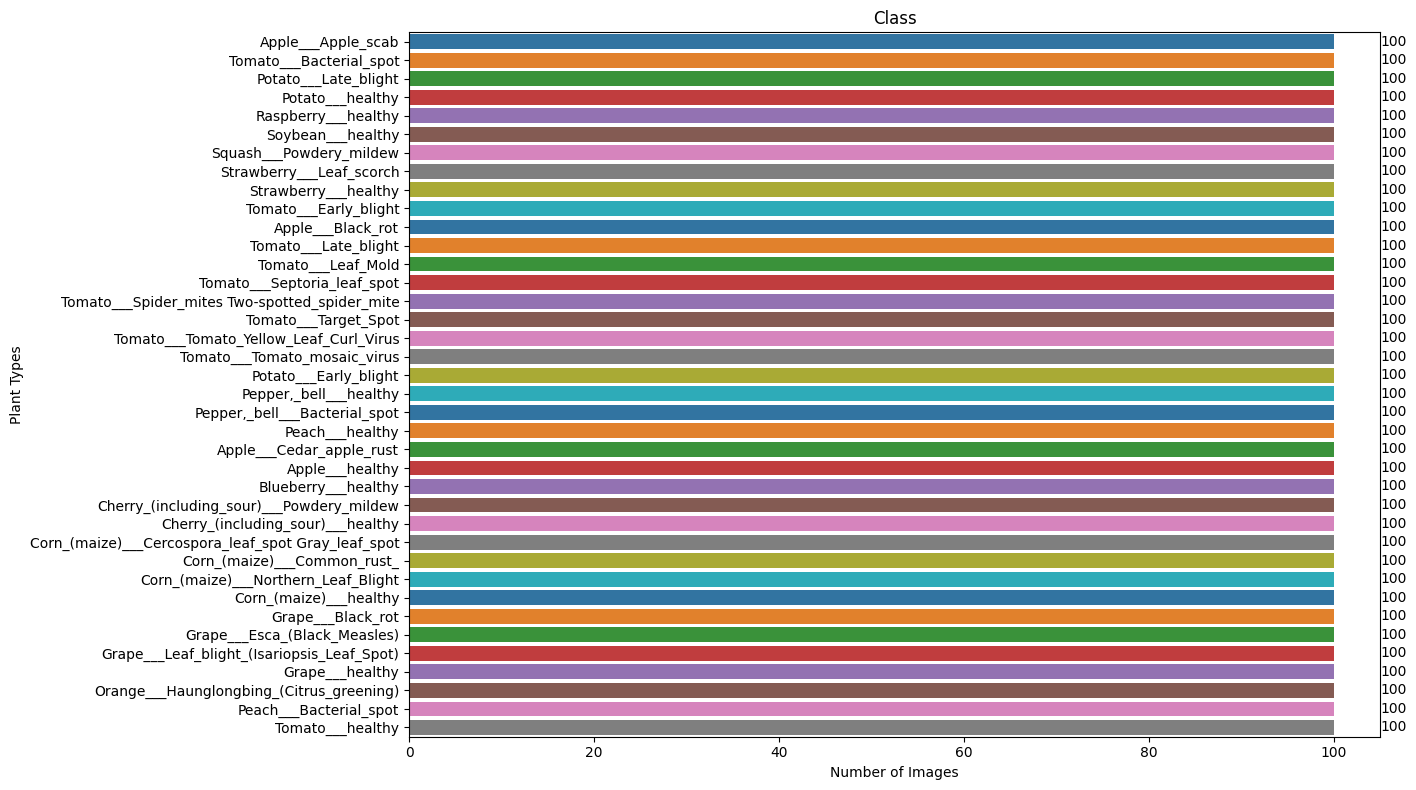

In [ ]:
class_counts = plant_disease_dataFrame['class_name'].value_counts()

plt.figure(figsize=(14, 8)) # creating figure of size 14 x 8
x = seaborn.barplot(x=class_counts.values, y=class_counts.index,
                    palette = seaborn.color_palette("tab10", n_colors=38), lw=0., orient='h') #creating bar plot with class sample counts on
                                                                             # x-axis and index number on y axis
plt.title('Class')
plt.xlabel('Number of Images')
plt.ylabel('Plant Types')
plt.tight_layout()

for i, v in enumerate(class_counts.values):
    x.text(v + 5, i, str(v), color='black', va='center')

plt.show()

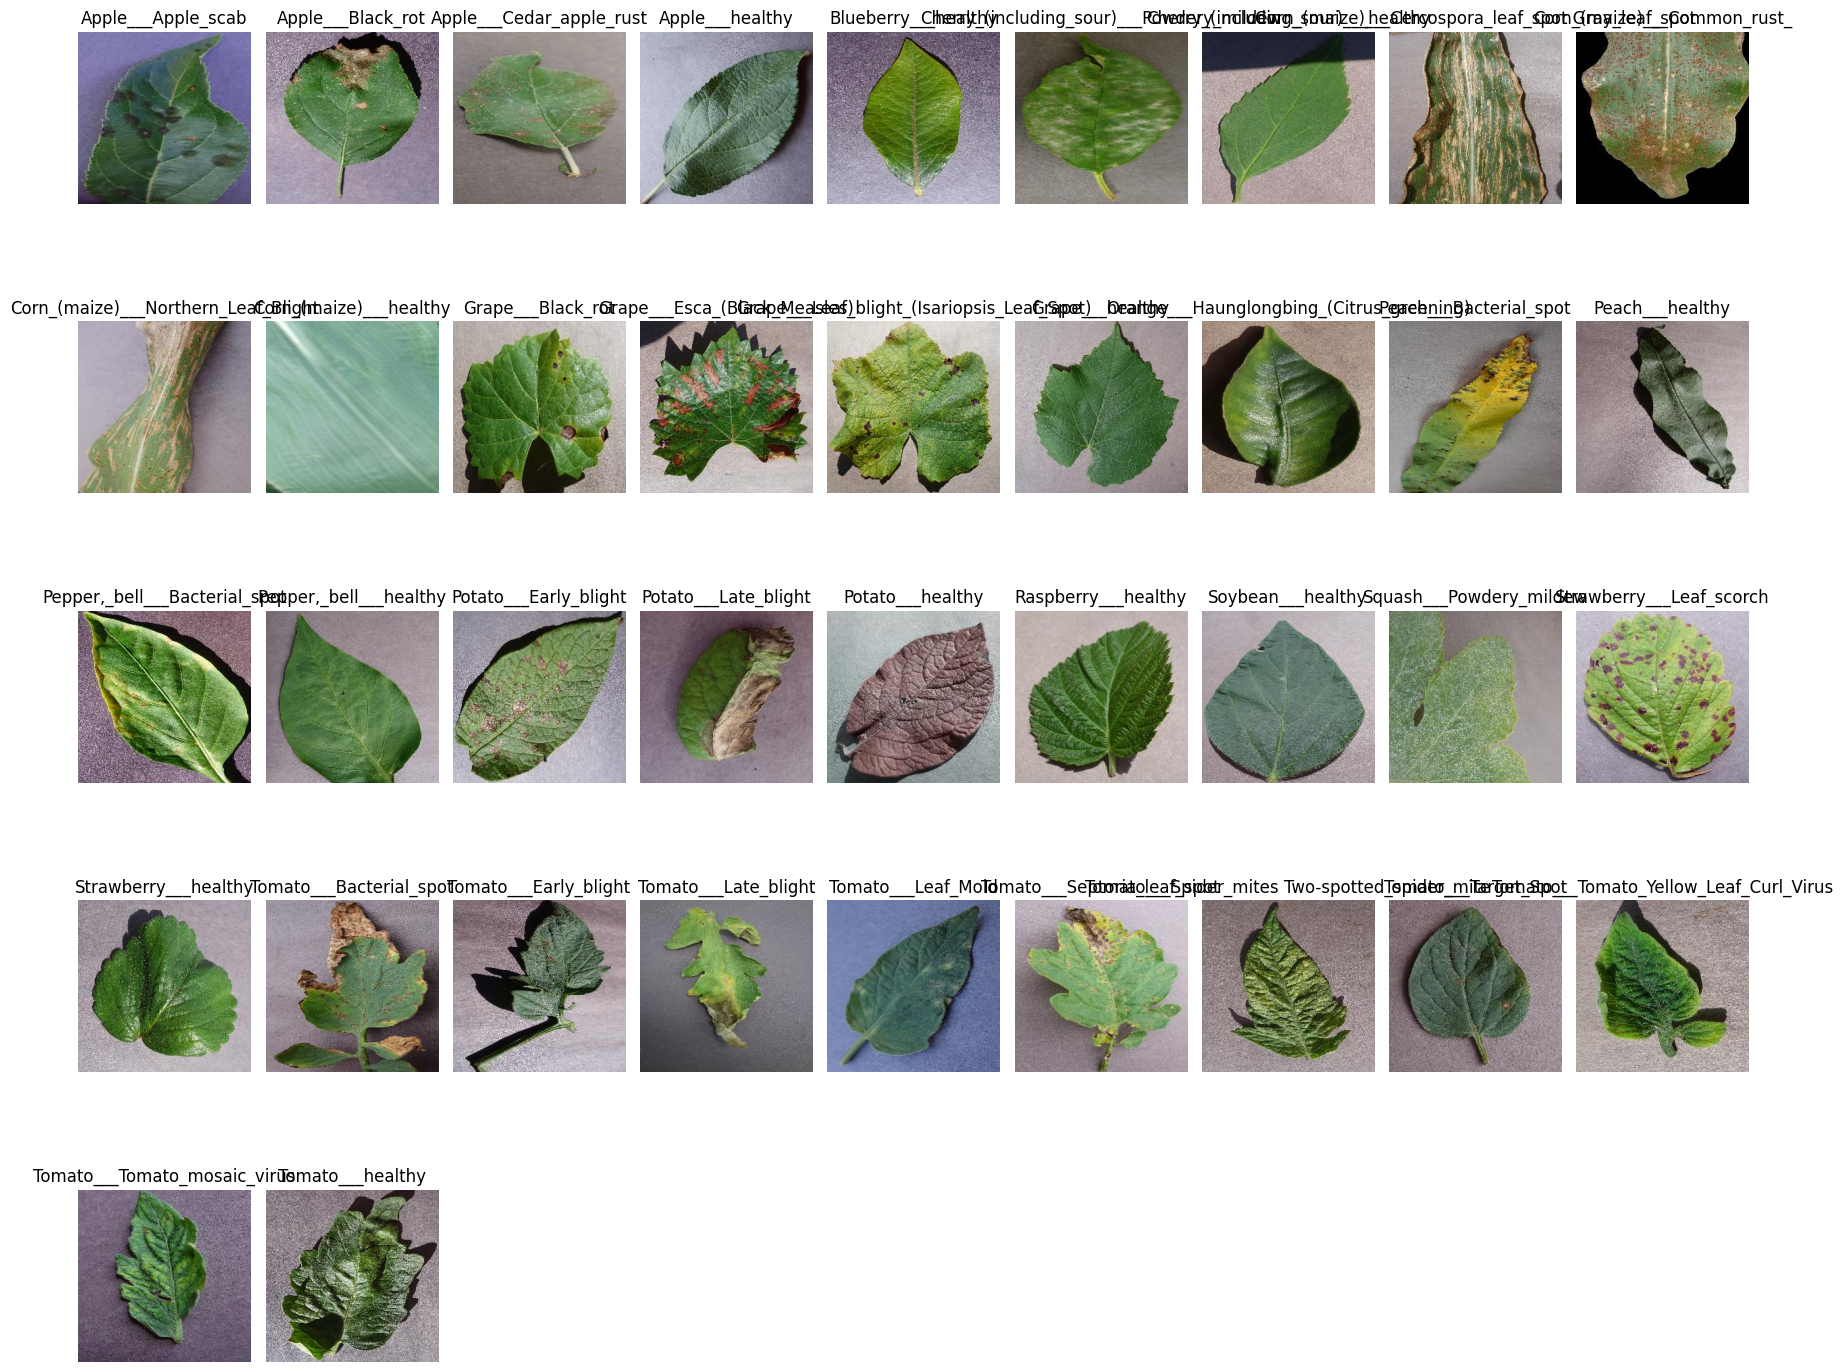

In [ ]:
num_classes = len(plant_disease_dataFrame['class_name'].unique())

num_images_per_row = 9
num_rows = (num_classes + num_images_per_row - 1) // num_images_per_row

figure = plt.figure(figsize=(17, 3 * num_rows))

for i, plant_class in enumerate(plant_disease_dataFrame['class_name'].unique()):
    plt.subplot(num_rows, num_images_per_row, i + 1)
    # path = os.path.join(dataset_directory, df[df['label'] == plant_class]['image_path'].iloc[0])
    path = plant_disease_dataFrame[plant_disease_dataFrame['class_name'] == plant_class]['image_path'].iloc[0]

    if os.path.exists(path):
        sample_image = cv2.imread(path)
        if sample_image is not None:
            plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
            plt.title(plant_class)
            plt.axis('off')
        else:
            print(f"Error: Unable to load image from path: {path}")
    else:
        print(f"Error: Image path does not exist: {path}")

plt.tight_layout()
plt.show()

### **Preprocessing**

**Image Denoise function**

**Parameters**

**`src`**: The input image

**`dst`**: The output dimension

**`h`**: The strength of the filter. 10 is the ideal value

**`hForColorComponents`**: Same as h but for colored images

**`templateWindowSize`**: The window size of the template. 7 is the ideal value.

**`searchWindowSize`**: The window size of the search area. 21 is the ideal value.



**Syntax**: cv2.fastNlMeansDenoisingColored( P1, P2, float P3, float P4, int P5, int P6)

Parameters:
P1 – Source Image Array

P2 – Destination Image Array

P3 – Size in pixels of the template patch that is used to compute weights.

P4 – Size in pixels of the window that is used to compute a weighted average for the given pixel.

P5 – Parameter regulating filter strength for luminance component.

P6 – Same as above but for color components // Not used in a grayscale image.

In [ ]:
def denoise_image(image):

  image = cv2.fastNlMeansDenoisingColored(image,None, 10, 10, 7, 21)
  return image
  pass

**hsv space based image segmentation**

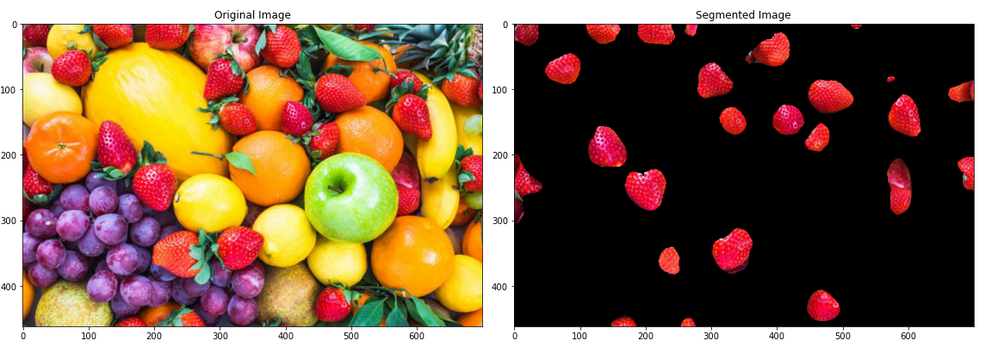

In [ ]:
def image_segmentation(image):

  hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) # getting hsv space of input image
  low = np.array([0, 34, 45]) # Applying lower threshold [R,G,B] (Min value is 0)
  high = np.array([255, 197, 160]) # Applying higher threshold [R,G,B] (Max value is 255)
  mask = cv2.inRange(hsv, low, high) # Getting segmentation mask after applying threshold

  kernel = np.ones((9,9),np.uint8)
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel) # Applying Morphological operation (closing) to close unneccessary holes in mask
  image = cv2.bitwise_and(image,image, mask= mask) # applying bitwise AND operation on input image with segmentation mask to remove background

  return image
  pass

**Augmentation (Flipping)**

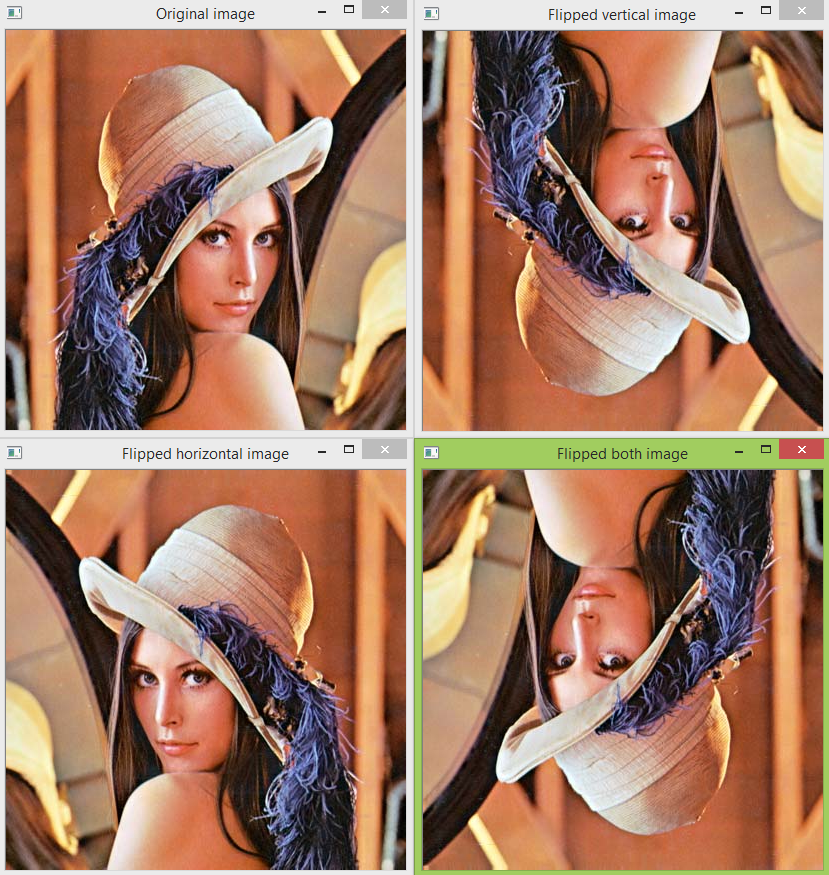

In [ ]:
def augmentation(image,method):

  if method == 'vertical_flip':
    image = image[::-1,:,:]
    pass
  elif method == 'horizontal_flip':
    image = image[:,::-1,:]
  elif method == 'none':
    image = image

  return image
  pass

**Gaussian Filter**

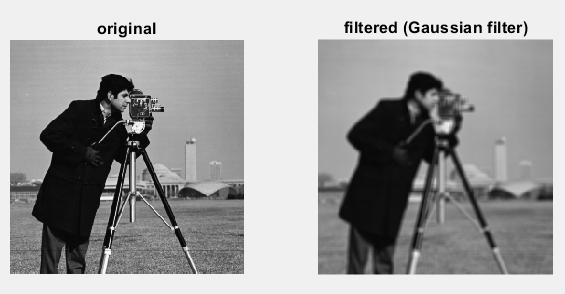

In [ ]:
def gaussian_technique(image):
  #  p1 = source image, p2 = kernel , p3 = std (default = 0)
  image = Gaussian = cv2.GaussianBlur(image, (1, 1), 0)
  return image
  pass

**Image Resize**

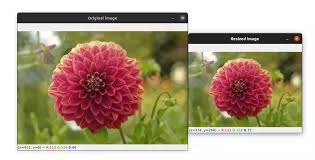

In [ ]:
def resize(image):

  image = cv2.resize(image,(224, 224))
  return image
  pass

**Image normalization (rescalling)**

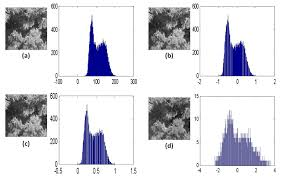

In [ ]:
def normalization(image):
  image = image/255
  return image
  pass

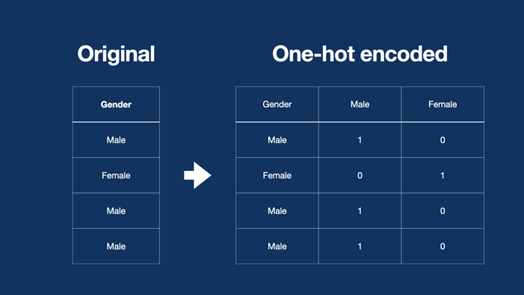

In [ ]:
def one_hot_encoding(label):

  label = to_categorical(label, num_classes=38)
  return label
  pass

In [ ]:
# shuffle the DataFrame rows
plant_disease_dataFrame.sample(frac = 1,random_state=42)

In [ ]:
plant_disease_dataFrame.to_csv('dataset_information.csv',index=False)

In [ ]:
plant_disease_dataFrame = pd.read_csv('dataset_information.csv')

In [ ]:
plant_disease_dataFrame

image_name  \
0     bd387a28-3b26-47d8-827b-062ae0a0f234___R.S_HL ...   
1     5be6f819-7f95-4078-bc8a-320b79dd5bee___FREC_Pw...   
2     3c0bb616-6225-47ac-815e-c5d37bcee978___RS_HL 5...   
3     7ec8c270-72a5-4c84-bfdb-400735f5b35c___GHLB_PS...   
4     483e8a16-c92f-4f69-a048-54c5f4c3676a___RS_Late...   
...                                                 ...   
3795  f4939e05-692c-4e69-bb5e-deaa15154031___FAM_B.R...   
3796  60f99768-a97b-4760-b503-3d045e02edce___FAM_B.M...   
3797                                   RS_Rust 1747.JPG   
3798  d44e8a78-33f7-48ae-907a-ba5f08ae9fa5___YLCV_GC...   
3799  4e9a0ebe-9df2-4fc6-ad17-3a2e3abdd55c___Crnl_L....   

                                             image_path  \
0     plant disease dataset/Corn_(maize)___healthy/b...   
1     plant disease dataset/Cherry_(including_sour)_...   
2     plant disease dataset/Blueberry___healthy/3c0b...   
3     plant disease dataset/Tomato___Late_blight/7ec...   
4     plant disease dataset/Tomato___Late_blight/483...   
...                                                 ...   
3795  plant disease dataset/Grape___Black_rot/f4939e...   
3796  plant disease dataset/Grape___Esca_(Black_Meas...   
3797  plant disease dataset/Corn_(maize)___Common_ru...   
3798  plant disease dataset/Tomato___Tomato_Yellow_L...   
3799  plant disease dataset/Tomato___Leaf_Mold/4e9a0...   

                                    class_name  label  
0                       Corn_(maize)___healthy     10  
1     Cherry_(including_sour)___Powdery_mildew      5  
2                          Blueberry___healthy      4  
3                         Tomato___Late_blight     30  
4                         Tomato___Late_blight     30  
...                                        ...    ...  
3795                         Grape___Black_rot     11  
3796              Grape___Esca_(Black_Measles)     12  
3797               Corn_(maize)___Common_rust_      8  
3798    Tomato___Tomato_Yellow_Leaf_Curl_Virus     35  
3799                        Tomato___Leaf_Mold     31  

[3800 rows x 4 columns]

In [ ]:
images_path_list = plant_disease_dataFrame['image_path'].values.tolist() # images Paths
labels_list = plant_disease_dataFrame['label'].values.tolist() # images Label values

images_path_list = np.array(images_path_list)
labels_array = np.array(labels_list)

# ((3800,), (3800,))
images_path_list.shape, labels_array.shape

((3800,), (3800,))

**Creating list of augmentation methods using random choices of horizontal or vertical flips**

In [ ]:
random.seed(42)
size = int(images_path_list.shape[0])

choices = ['horizontal_flip','vertical_flip','none']
weights = [0.05, 0.05, 0.9]

augmentation_choices = random.choices(choices,weights, k=size)

In [ ]:
augmentation_choices[0:20]

['none',
 'horizontal_flip',
 'none',
 'none',
 'none',
 'none',
 'none',
 'vertical_flip',
 'none',
 'horizontal_flip',
 'none',
 'none',
 'horizontal_flip',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'horizontal_flip']

In [ ]:
images_list = []
for idx,image_path in enumerate(images_path_list):

  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = augmentation(image,augmentation_choices[i])
  image = resize(image)
  image = denoise_image(image)
  image = gaussian_technique(image)
  image = image_segmentation(image)
  image = normalization(image)

  images_list.append(image)
  pass

In [ ]:
len(images_list)

3800

In [ ]:
import pickle as pkl

In [ ]:
# with open('preprocessed_images.pkl', 'wb') as f:
#   pkl.dump(images_list, f)

In [ ]:
# with open('preprocessed_images_labels.pkl', 'wb') as f:
#   pkl.dump(labels_list, f)

In [ ]:
!ls

 cnn_model_scores.csv	   inception_v3_model_scores.csv   preprocessed_images_labels.pkl
 dataset_information.csv   kaggle.json			   preprocessed_images.pkl
 dataset_labels.csv	  'plant disease dataset'	   vgg_scores.csv


In [ ]:
with open('preprocessed_images.pkl', 'rb') as f:
  images_list = pkl.load(f)
with open('preprocessed_images_labels.pkl', 'rb') as f:
  labels_list = pkl.load(f)

**Training and validation set separation (80% train 20% validation)**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  images_list,labels_list , random_state=42,test_size=0.20, shuffle=True)

In [ ]:
len(X_train), len(X_test)

(3040, 760)

**Images Batches Generator**

In [ ]:
def load_img(images_list, labels_list):
    images=[]
    labels = []

    for i, image in enumerate(images_list):
      images.append(image)
      pass

    for label in labels_list:
      label = one_hot_encoding(label)
      labels.append(label)
      pass

    images = np.array(images)
    labels = np.array(labels)
    return(images,labels)

def imageLoader(images_list, labels_list, batch_size):

    L = len(images_list)
    #keras needs the generator infinite, so we will use while true
    while True:
        batch_start = 0
        batch_end = batch_size
        while batch_start < L:
            limit = min(batch_end, L)
            X,Y = load_img(images_list[batch_start:limit], labels_list[batch_start:limit])
            yield (X,Y) #a tuple with two numpy arrays with batch_size samples
            batch_start += batch_size
            batch_end += batch_size
            pass
        pass
    pass
############################################

In [ ]:
train_img_datagen = imageLoader(X_train, y_train, batch_size=50)
test_img_datagen = imageLoader(X_test, y_test, batch_size=10)

In [ ]:
train_images_batch, train_labels_batch = train_img_datagen.__next__()
test_images_batch, test_labels_batch = test_img_datagen.__next__()

In [ ]:
print("Training Images Batch ==>",train_images_batch.shape, train_labels_batch.shape)
print("Validation Images Batch ==>",test_images_batch.shape, test_labels_batch.shape)

Training Images Batch ==> (50, 224, 224, 3) (50, 38)
Validation Images Batch ==> (10, 224, 224, 3) (10, 38)


In [ ]:
labels_dataFrame = pd.read_csv('dataset_labels.csv')

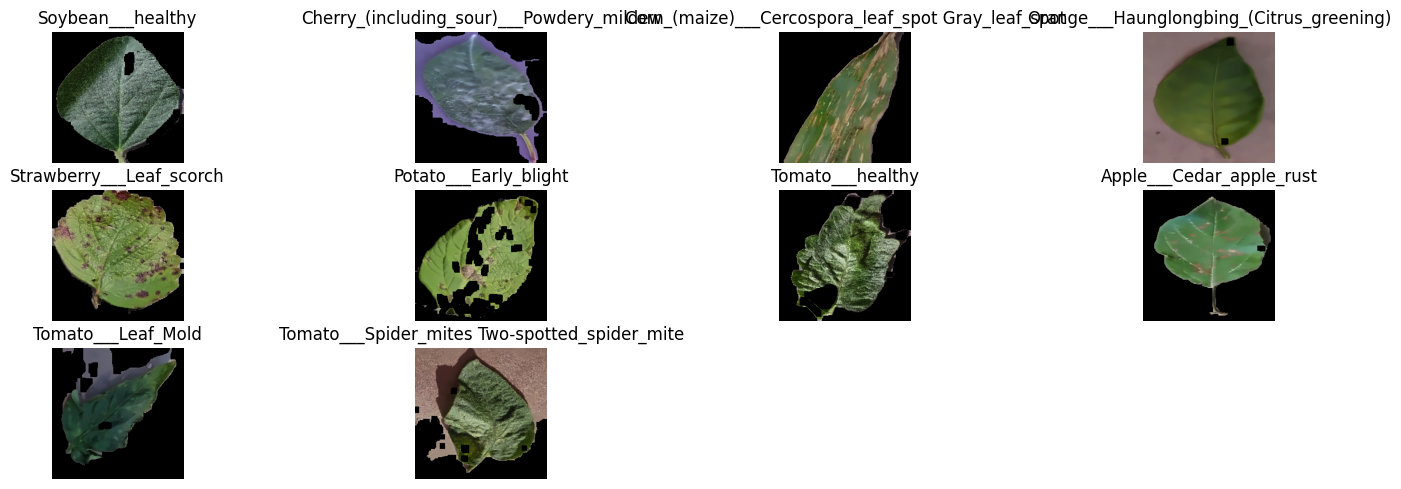

In [ ]:
plt.figure(figsize=(18,14)) # specifying the overall grid size

for i in range(10):
    plt.subplot(7,4,i+1)    # the number of images in the grid is 5*5 (25)
                            #getting class name from label
    plt.title(labels_dataFrame.loc[labels_dataFrame['label'] == np.argmax(train_labels_batch[i],axis=-1),'class_name'].values[0])

    #plt.title(np.argmax(train_labels_batch[i],axis=-1))
    plt.axis('off')
    plt.imshow(train_images_batch[i,:,:,:])
plt.show()

**Training**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten
from keras.models import Model

**Evaluation Metrics**

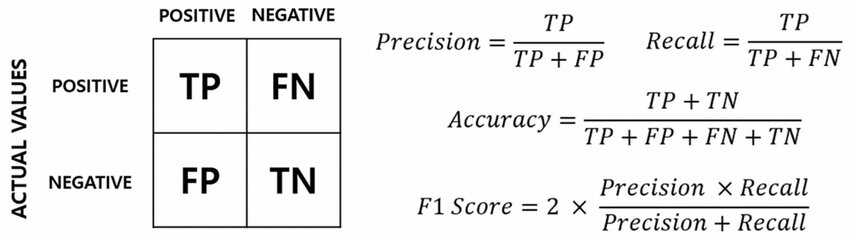

In [ ]:
from keras import backend as K
import keras

def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


metrics = ['accuracy', Precision, Recall, f1_score]

**VGG16**

In [ ]:
from keras.applications import VGG16

vgg_base_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling="max",
    classes=38,
)

num_classes = 38

for layer in vgg_base_model.layers:
        layer.trainable=False

VGG16_model = Sequential()

VGG16_model.add(vgg_base_model)
VGG16_model.add(Flatten())
VGG16_model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
VGG16_model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
VGG16_model.add(Dropout(0.2))
VGG16_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
VGG16_model.add(Dropout(0.2))
VGG16_model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
VGG16_model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
VGG16_model.add(Dense(38, activation='softmax'))

print(VGG16_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [ ]:
optimizer = Adam(learning_rate=0.001)
VGG16_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=metrics)

In [ ]:
batch_size = 300

test_batch_size = 75

steps_per_epoch = len(X_train)//batch_size
test_steps_per_epoch = len(X_test)//test_batch_size


vgg_history=VGG16_model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=500,
          verbose=1,
          validation_data=test_img_datagen,
          validation_steps=test_steps_per_epoch,
          )

%cd
VGG16_model.save('/content/plants_disease_vgg.h5')
%cd /content/drive/MyDrive/plants dataset

Epoch 1/500
10/10 [==============================] - 21s 619ms/step - loss: 3.8422 - accuracy: 0.0300 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 3.6780 - val_accuracy: 0.0300 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/500
10/10 [==============================] - 3s 276ms/step - loss: 3.6798 - accuracy: 0.0180 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 3.6636 - val_accuracy: 0.0400 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/500
10/10 [==============================] - 3s 293ms/step - loss: 3.6914 - accuracy: 0.0220 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 3.5860 - val_accuracy: 0.0500 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 4/500
10/10 [==============================] - 3s 285ms/step - loss: 3.6237 - accuracy: 0.0420 - Precision: 0.0000e+00 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


/content/drive/.shortcut-targets-by-id/1sFkTFiHix4JCgwOqH1iYYCPCXvLPuOaj/plants dataset


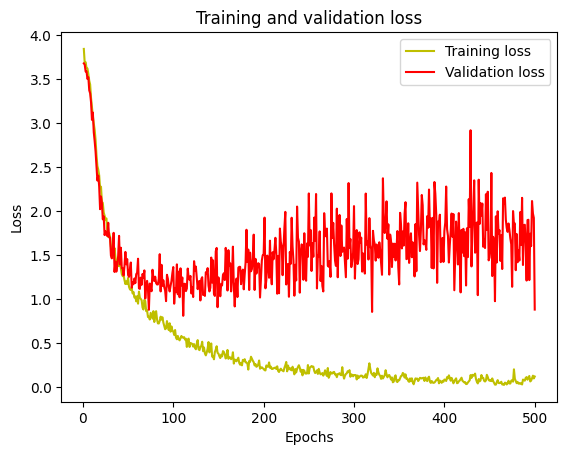

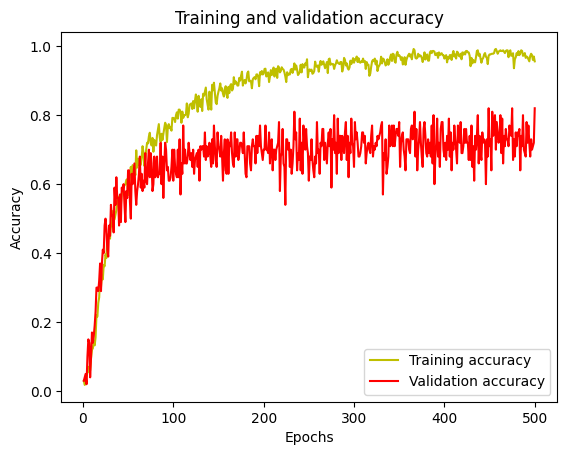

In [ ]:

##################################################################


#plot the training and validation IoU and loss at each epoch
loss = vgg_history.history['loss']
val_loss = vgg_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = vgg_history.history['accuracy']
val_acc = vgg_history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

In [ ]:
# vgg_scores = VGG16_model.evaluate(np.asarray(test_images_list,dtype='object').astype(np.float32))

test_img_datagen = imageLoader(X_test, y_test, batch_size=len(X_test))
VGG16_model = load_model('/content/plants_disease_vgg.h5',compile=False)
VGG16_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=metrics)
images, labels = test_img_datagen.__next__()
vgg_scores = VGG16_model.evaluate(images, labels, verbose=1)


24/24 [==============================] - 15s 354ms/step - loss: 1.5961 - accuracy: 0.7289 - Precision: 0.7485 - Recall: 0.7244 - f1_score: 0.7360


In [ ]:
columns_name = ['Loss','Accuracy', 'Precision', 'Recall', 'F1_score']
vgg_scores_dataFrame = pd.DataFrame([vgg_scores],columns=columns_name)
vgg_scores_dataFrame.to_csv('/content/vgg_scores.csv',index=False)
vgg_scores_dataFrame

Loss  Accuracy  Precision    Recall  F1_score
0  1.596089  0.728947    0.74852  0.724392  0.735985



---



**Inception V3**

In [ ]:
from keras.applications import VGG16, InceptionV3

inception_v3_base_model = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling='max',
    classes=38,
)

for layer in inception_v3_base_model.layers:
        layer.trainable=False

num_classes = 38


inception_v3_model = Sequential()

inception_v3_model.add(inception_v3_base_model)
inception_v3_model.add(Flatten())
inception_v3_model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
inception_v3_model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
inception_v3_model.add(Dropout(0.2))
inception_v3_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
inception_v3_model.add(Dropout(0.2))
inception_v3_model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
inception_v3_model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
inception_v3_model.add(Dense(38, activation='softmax'))

print(inception_v3_model.summary())

87910968/87910968 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                         

In [ ]:
optimizer = Adam(learning_rate=0.001)
inception_v3_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=metrics)

In [ ]:
batch_size = 300

test_batch_size = 75

steps_per_epoch = len(X_train)//batch_size
test_steps_per_epoch = len(X_test)//test_batch_size


inception_v3_history=inception_v3_model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=500,
          verbose=1,
          validation_data=test_img_datagen,
          validation_steps=test_steps_per_epoch,
          )

%cd
inception_v3_model.save('/content/plants_disease_inceptionv3.h5')
%cd /content/drive/MyDrive/plants dataset

Epoch 1/500
10/10 [==============================] - 19s 549ms/step - loss: 4.9743 - accuracy: 0.0220 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 3.7951 - val_accuracy: 0.0100 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/500
10/10 [==============================] - 1s 143ms/step - loss: 3.9803 - accuracy: 0.0160 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 3.6501 - val_accuracy: 0.0100 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/500
10/10 [==============================] - 1s 145ms/step - loss: 3.7657 - accuracy: 0.0340 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 3.6722 - val_accuracy: 0.0200 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 4/500
10/10 [==============================] - 2s 181ms/step - loss: 3.7501 - accuracy: 0.0220 - Precision: 0.0000e+00 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


/content/drive/.shortcut-targets-by-id/1sFkTFiHix4JCgwOqH1iYYCPCXvLPuOaj/plants dataset


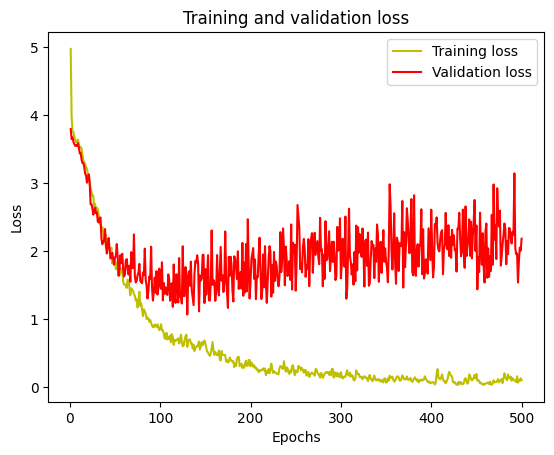

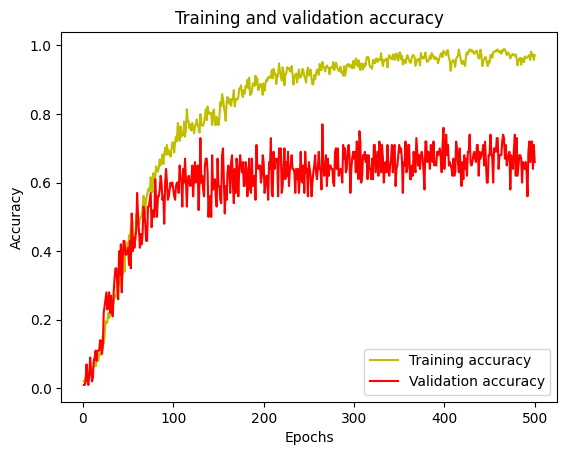

In [ ]:

##################################################################


#plot the training and validation IoU and loss at each epoch
loss = inception_v3_history.history['loss']
val_loss = inception_v3_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = inception_v3_history.history['accuracy']
val_acc = inception_v3_history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_img_datagen = imageLoader(X_test, y_test, batch_size=len(X_test))
images, labels = test_img_datagen.__next__()
inception_v3_model_scores = inception_v3_model.evaluate(images, labels, verbose=1)

24/24 [==============================] - 7s 179ms/step - loss: 2.2924 - accuracy: 0.6592 - Precision: 0.6841 - Recall: 0.6489 - f1_score: 0.6658


In [ ]:
columns_name = ['Loss','Accuracy', 'Precision', 'Recall', 'F1_score']
inception_v3_model_scores_dataFrame = pd.DataFrame([inception_v3_model_scores],columns=columns_name)
inception_v3_model_scores_dataFrame.to_csv('inception_v3_model_scores.csv',index=False)
inception_v3_model_scores_dataFrame

Loss  Accuracy  Precision    Recall  F1_score
0  2.292374  0.659211   0.684118  0.648872  0.665818



---



**Inference**

In [ ]:
test_img_datagen = imageLoader(X_test, y_test, batch_size=len(X_test))
images, labels = test_img_datagen.__next__()
VGG16_model = load_model('/content/plants_disease_vgg.h5',compile=False)
VGG16_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=metrics)
predictions = VGG16_model.predict(images, verbose=1)

24/24 [==============================] - 14s 320ms/step


In [ ]:
post_processed_predictions = np.argmax(predictions, axis=-1)

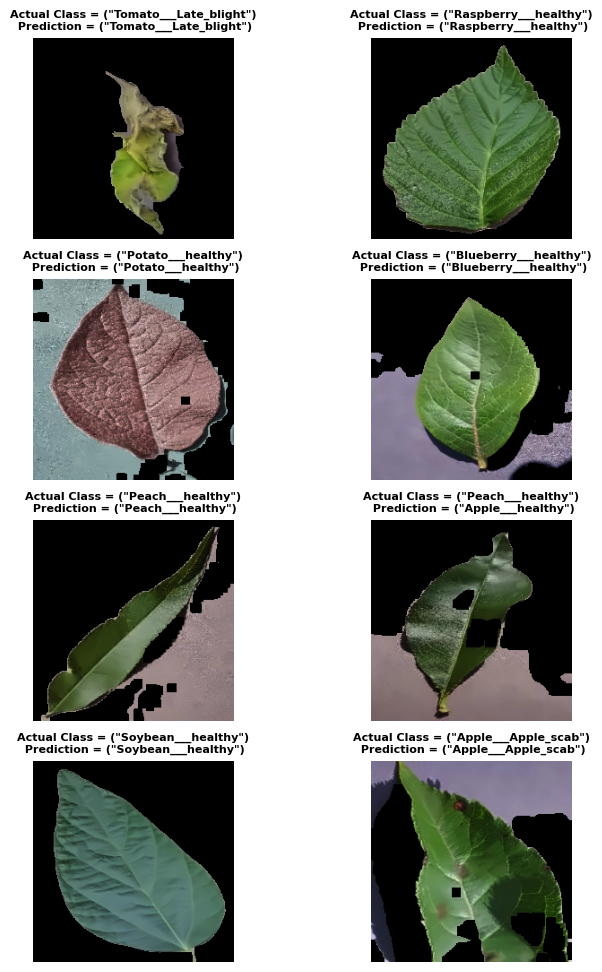

In [ ]:
plt.figure(figsize=(8,12)) # specifying the overall grid size

for i in range(8):
    plt.subplot(4,2,i+1)    # the number of images in the grid is 5*5 (25)
                            #getting class name from label

    actual_class = labels_dataFrame.loc[labels_dataFrame['label'] == np.argmax(labels[i+145],axis=-1),'class_name'].values[0]
    prediction = labels_dataFrame.loc[labels_dataFrame['label'] == post_processed_predictions[i+145],'class_name'].values[0]

    title = 'Actual Class = ("' + str(actual_class) + '")\n Prediction = ("' + prediction + '")'
    plt.title(title,fontweight='bold',fontsize = 8)

    #plt.title(np.argmax(train_labels_batch[i],axis=-1))
    plt.axis('off')
    plt.imshow(images[i+145,:,:,:])
    pass

plt.show()

**SciKit Learn SVM Machine learning model**

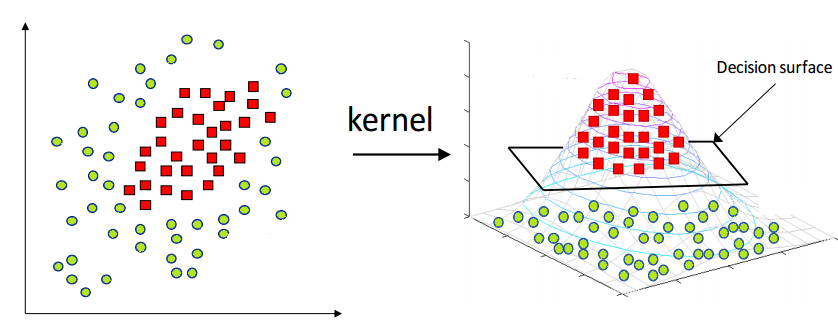

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report

In [ ]:
X_train_features = []
y_train_labels = []
for idx,(feature, label) in enumerate(zip(X_train, y_train)):

  X_train_features.append(feature.flatten())
  y_train_labels.append(label)

  if idx == 1000:
    break
    pass
  pass

In [ ]:
SVM_model = svm.SVC(kernel='linear')
SVM_model.fit(X_train_features, y_train_labels)

SVC(kernel='linear')

In [ ]:
X_test_features = []
y_test_labels = []
for idx,(test_feature, test_label) in enumerate(zip(X_test, y_test)):

  X_test_features.append(test_feature.flatten())
  y_test_labels.append(test_label)

  # if idx == 1000:
  #   break
  #   pass
  pass

In [ ]:
# Testing the model using the testing data
y_pred = SVM_model.predict(X_test_features)

In [ ]:
report = classification_report(y_test_labels, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.17      0.28      0.21        18
           1       0.32      0.40      0.35        15
           2       0.24      0.31      0.27        16
           3       0.44      0.43      0.44        28
           4       0.24      0.29      0.26        14
           5       0.22      0.17      0.20        23
           6       0.24      0.40      0.30        20
           7       0.48      0.50      0.49        20
           8       0.53      0.41      0.46        22
           9       0.26      0.53      0.35        15
          10       0.58      0.48      0.52        23
          11       0.33      0.29      0.31        24
          12       0.52      0.55      0.53        22
          13       1.00      0.60      0.75        20
          14       0.49      0.78      0.60        23
          15       0.29      0.48      0.36        21
          16       0.16      0.24      0.19        17
          17       0.58    

In [ ]:
columns_name = ['Accuracy', 'Precision', 'Recall', 'F1_score']
ML_SVM_scores_dataFrame = pd.DataFrame([[0.38, 0.4, 0.38, 0.38]],columns=columns_name)
ML_SVM_scores_dataFrame.to_csv('ML_SVM_model_scores.csv',index=False)
ML_SVM_scores_dataFrame

Accuracy  Precision  Recall  F1_score
0      0.38        0.4    0.38      0.38